In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [360]:
#import_df = pd.read_csv('2f_Scans.csv',header=None) #Bulge under 2f
import_df = pd.read_csv('Outputs/50415_703.dat',header=None) #Bulge half under 2f
#import_df = pd.read_csv('Outputs/51317_677.dat',header=None) #Bulge half under 2f
#import_df = pd.read_csv('Outputs/51637_690.dat',header=None) #Bulge half under 2f
#import_df = pd.read_csv('Outputs/51865_699.dat',header=None) #Bulge just outside 2f
#import_df = pd.read_csv('Outputs/52387_656.dat',header=None) #No CO2


import_df.columns = ['raw_data']
import_df.head()

,raw_data
0,-6256.0
1,-6257.0
2,-6228.0
3,-6177.0
4,-6113.0


[-1.25373213e+03 -7.44197635e+01  5.01379491e-01 -1.74434049e-03
  3.23886437e-06 -3.03290593e-09  1.12251945e-12]


<IPython.core.display.Javascript object>


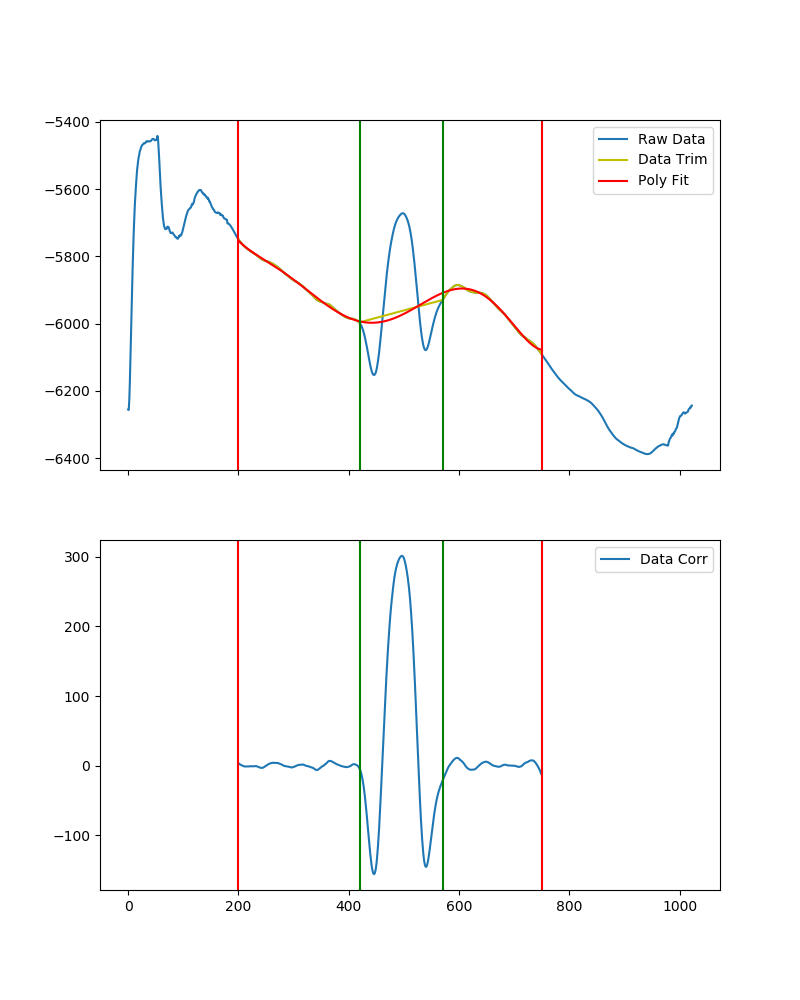

In [364]:
def poly(x,*args):
    f_poly = 0
    for count, coef in enumerate(args):
        f_poly = f_poly + coef*x**count
    return f_poly

#Define data limits

x_st = 200
x_end = 750
f_st = 420
f_end = 570

#copy data to new DF
Fit_df = import_df.copy()
Fit_df.columns = ['data']


#trim Raw Data
Fit_df = Fit_df.drop(Fit_df.index[f_st:f_end])
Fit_df = Fit_df[x_st:x_end-(f_end-f_st)]

#Fit data with polynomial
popt, pconv = curve_fit(poly,Fit_df.index.values,Fit_df['data'],p0=[1,1,1,1,1,1,1])
print(popt)

fit_x = np.linspace(x_st,x_end,x_end-x_st) #fit data x values

Analysis_df = import_df.copy()
Analysis_df.columns = ['data']
Analysis_df = Analysis_df[x_st:x_end]

Analysis_df['data'] = Analysis_df['data']-poly(fit_x,*popt)

%matplotlib notebook

#plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
f, axarr = plt.subplots(2, sharex=True,figsize=(8, 10))
axarr[0].plot(import_df['raw_data'], label='Raw Data')
axarr[0].plot(Fit_df['data'],'y', label='Data Trim')
axarr[0].plot(fit_x,poly(fit_x,*popt),'r',label='Poly Fit')
axarr[0].axvline(x=x_st,linewidth=1.5, color='r')
axarr[0].axvline(x=x_end,linewidth=1.5, color='r')
axarr[0].axvline(x=f_st,linewidth=1.5, color='g')
axarr[0].axvline(x=f_end,linewidth=1.5, color='g')

axarr[1].plot(Analysis_df['data'],label='Data Corr')
axarr[1].axvline(x=x_st,linewidth=1.5, color='r')
axarr[1].axvline(x=x_end,linewidth=1.5, color='r')
axarr[1].axvline(x=f_st,linewidth=1.5, color='g')
axarr[1].axvline(x=f_end,linewidth=1.5, color='g')

for ax in axarr.flat:
    ax.legend(loc="upper right")
plt.show()